In [111]:
import random
import pickle
from torchvision import datasets
from PIL import Image
import numpy as np
import os
from tqdm import tqdm

In [112]:
mnist_data = datasets.MNIST(root="./data", train=True, download=True)
num_samples = 100000
image_width = 168
image_height = 40
horizontal_spacing = 5
final_images = []
targets = []

### Synthetic Data Creation

Randomly choose 3, 4, or 5 samples from the MNIST dataset (with 4 being the most occuring to match the distribution of the target data). Scale them by a small amount (as the given data does not have extensive scaling of the numbers). This is followed by randomly placing the numbers in the image in the same sequence. Synthetic data is created to ensure that a seq2seq model can be trained.  

In [113]:
for _ in tqdm(range(num_samples), desc="Generating Images"):

    composite_image = Image.new("L", (image_width, image_height), color=0)
    target = ""

    num_digits = random.choices([3, 4, 5], weights=[0.05, 0.9, 0.05])[0]
    digits = random.choices(range(len(mnist_data)), k=num_digits)
    current_x = 0

    for digit_idx in digits:
        digit_image, label = mnist_data[digit_idx]
        target += str(label)

        scale = random.uniform(0.8, 1.2)
        new_width = int(digit_image.width * scale)
        new_height = int(digit_image.height * scale)
        digit_image = digit_image.resize((new_width, new_height))
        max_y = image_height - new_height
        y_offset = random.randint(0, max_y)

        if current_x + new_width > image_width:
            break

        composite_image.paste(digit_image, (current_x, y_offset))
        current_x += new_width + horizontal_spacing

    final_images.append(np.array(composite_image, dtype=np.uint8))
    targets.append(target)

Generating Images: 100%|██████████| 100000/100000 [00:15<00:00, 6356.24it/s]


In [115]:
final_images_array = np.stack(final_images)
os.makedirs("synthetic_data", exist_ok=True)
np.save("synthetic_data/images.npy", final_images_array)

with open("synthetic_data/targets.pkl", "wb") as f:
    pickle.dump(targets, f)

### Randomly verifying the integrity of the created data

In [117]:
import matplotlib.pyplot as plt

dset = np.load("synthetic_data/images.npy")
with open("synthetic_data/targets.pkl", "rb") as f:
    target_array = pickle.load(f)

In [118]:
dset.shape

(100000, 40, 168)

0836


(<matplotlib.image.AxesImage at 0x2315fffedb0>, None)

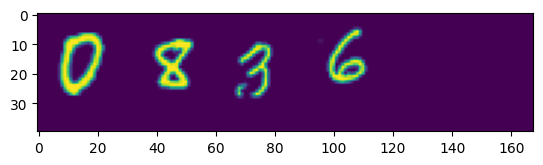

In [145]:
index = np.random.choice(range(len(dset)))
plt.imshow(dset[index]), print(target_array[index])